# modele

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.losses import MAE

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,  r2_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

import joblib

In [2]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mae'])
model.save('benchmark1_pl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [3]:
model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=500),
        LSTM(64, dropout=0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
model.compile(optimizer='adam', loss='mae', metrics=['accuracy','mae'])
model.save('benchmark2_pl.h5')

In [4]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))  # 10 classes for 0-9 ratings

    # Use sparse_categorical_crossentropy for integer labels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('1_na_int_pl.h5')

In [5]:
model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=500),
        LSTM(64, dropout=0.2),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')  # For 5 classes (0-4)
])

    # Using sparse_categorical_crossentropy for integer labels (0-4)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('2_na_int_pl.h5')

In [6]:
model = Sequential([
      Embedding(input_dim=10000, output_dim=128, input_length=500),
      Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)),
      LSTM(64, dropout=0.2),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')  # For 5 classes (0-4)
    ])

    # Using sparse_categorical_crossentropy for integer labels (0-4)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('bidirectional_pl.h5')

In [7]:
model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=500),
        GRU(128, dropout=0.2),  # GRU layer with 128 units and dropout
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')  # For 5 classes (0-4)
    ])

    # Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('GRU_pl.h5')

In [8]:
model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=500),  # Word embeddings
        Conv1D(128, kernel_size=5, activation='relu'),  # CNN for local patterns
        MaxPooling1D(pool_size=4),  # Reduce sequence length
        LSTM(64, dropout=0.2, return_sequences=False),  # LSTM for sequential dependencies
        Dense(64, activation='relu'),  # Fully connected layer
        Dropout(0.3),  # Dropout for regularization
        Dense(10, activation='softmax')  # Output layer for classification
    ])

    # Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('CNN_RNN_pl.h5')

In [44]:
import pickle
from sklearn import set_config


In [47]:
nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB())
])

with open('MultinomialNB_pl.pkl', 'wb') as f:
    joblib.dump(nb_pipeline, f)
set_config(display="diagram")
nb_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier', MultinomialNB())])

In [13]:
model = SVC(kernel='linear', C=1, probability=True)  # Linear kernel SVM with soft margin

with open('svc_pl.pkl','wb') as f:
    pickle.dump(model,f)

In [14]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42))
    ])
with open('LR_pl.pkl','wb') as f:
    pickle.dump(pipeline,f)

# wykresy

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import io

In [17]:
pl_acc_1000 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.16,0.16
lstm2  - relu,0.24,0.21
lstm1 - int,0.27,0.26
lstm2 - int,0.2245,0.24
lstm2 - biderectional - int,0.207,0.27
gru,0.192,0.21
CNN + RNN hybrid,0.2425,0.26
MultinomialNB,0.34,0.35
'''), header=0)

svc_1000_pl = pd.read_csv(io.StringIO('''
SVC,0.2925
LogisticRegression,0.287
'''), header=None, names=["type", "default"])

combined_data = pd.concat([pl_acc_1000, svc_1000_pl], ignore_index=True)


In [18]:
pl_f1_1000 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.14,0.14
lstm2  - relu,0.24,0.20
lstm1 - int,0.25,0.23
lstm2 - int,0.17,0.22
lstm2 - biderectional - int,0.15,0.25
gru,0.16,0.15
CNN + RNN hybrid,0.22,0.23
MultinomialNB,0.33,0.34
'''), header=0)

svc_f1_pl = pd.read_csv(io.StringIO('''
SVC,0.29
LogisticRegression,0.28
'''), header=None, names=["type", "default"])
combined_data = pd.concat([pl_f1_1000, svc_f1_pl], ignore_index=True)

In [19]:
def plot_full(data_default_custom, rest_data, title =  'Comparison of Accuracy for different tokenizers, SVC and LogisticRegression', ylabel = 'Accuracy values'):
  fig, ax = plt.subplots(figsize=(12, 6))
  x = range(len(data_default_custom))

  bar_width = 0.35
  ax.bar(x, data_default_custom['default'], width=bar_width, label='Default', align='center')
  ax.bar([p + bar_width for p in x], data_default_custom['custom'], width=bar_width, label='Custom', align='center')

  ax.bar(len(data_default_custom), rest_data.iloc[0, 1], width=bar_width, color='green', label='SVC', align='center')
  ax.bar(len(data_default_custom) + bar_width, rest_data.iloc[1, 1], width=bar_width, color='orange', label='LogisticRegression', align='center')

  ax.set_xticks([p + bar_width/2 for p in x] + [len(data_default_custom) + bar_width/2, len(data_default_custom) + bar_width * 1.5])
  ax.set_xticklabels(list(data_default_custom['type']) + ['SVC', 'LogisticRegression'], rotation=45, ha='right')

  #ax.set_xlabel('Type')
  ax.set_ylabel(ylabel)
  ax.set_title(title)

  ax.legend()

  plt.tight_layout()
  plt.show()

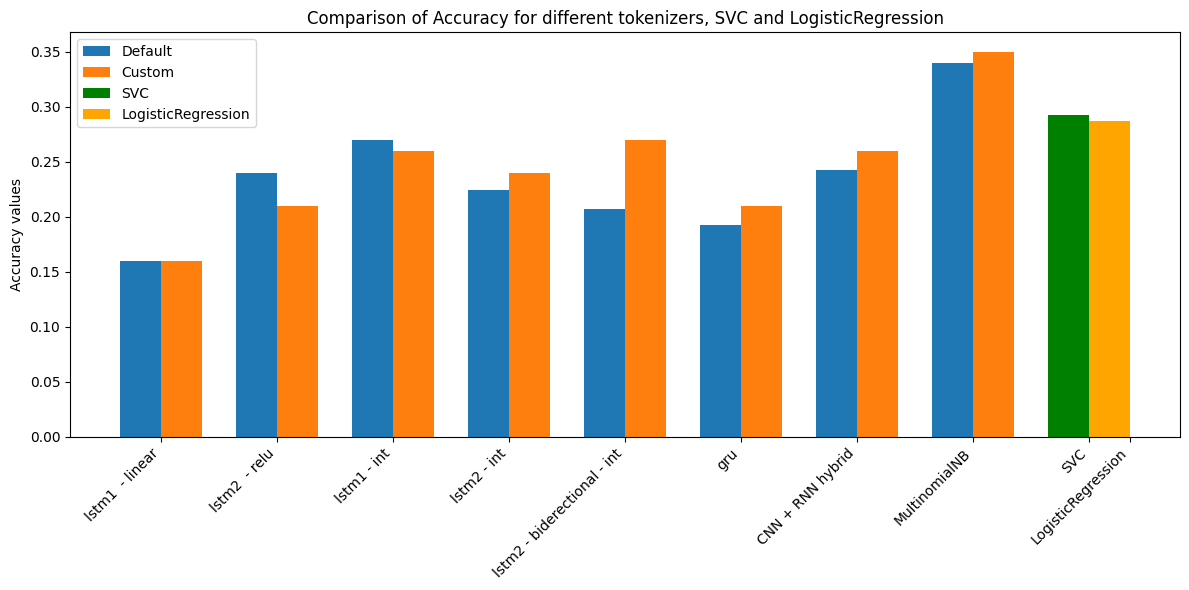

In [20]:
plot_full(pl_acc_1000, svc_1000_pl)

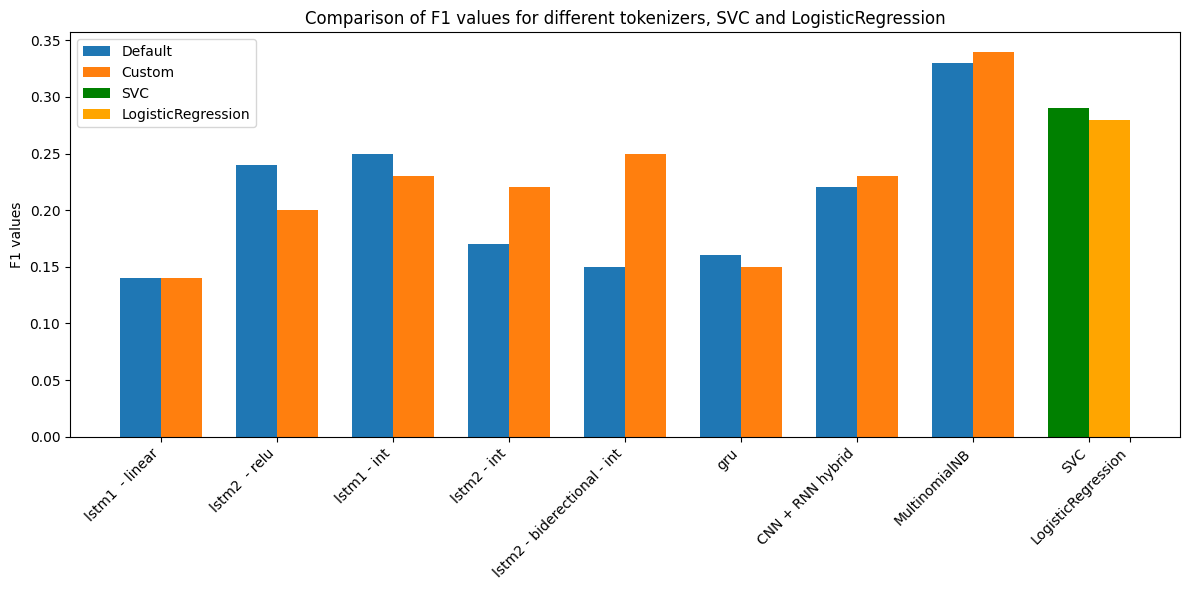

In [21]:
plot_full(pl_f1_1000, svc_f1_pl,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')

In [22]:
pl3acc = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.23,0.22
lstm2  - relu,0.32,0.26
lstm1 - int,0.34,0.30
lstm2 - int,0.36,0.34
lstm2 - biderectional - int,0.34,0.29
gru,0.34,0.32
CNN + RNN hybrid,0.34,0.32
MultinomialNB,0.37,0.35
'''), header=0)

pl3accs = pd.read_csv(io.StringIO('''
SVC,0.39
LogisticRegression,0.38
'''), header=None, names=["type", "default"])

combined_data = pd.concat([pl3acc, pl3accs], ignore_index=True)

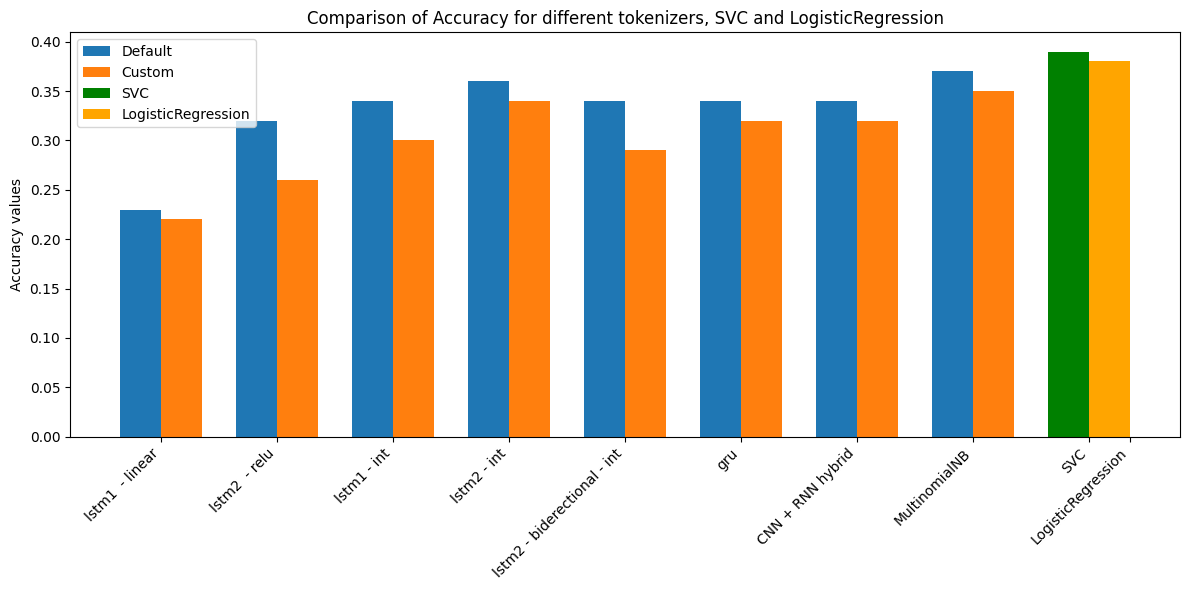

In [23]:
plot_full(pl3acc, pl3accs)

In [24]:
pl3f1 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.21,0.19
lstm2  - relu,0.31,0.26
lstm1 - int,0.33,0.28
lstm2 - int,0.35,0.33
lstm2 - biderectional - int,0.33,0.26
gru,0.33,0.30
CNN + RNN hybrid,0.33,0.29
MultinomialNB,0.36,0.34
'''), header=0)


pl3f1s = pd.read_csv(io.StringIO('''
SVC,0.38
LogisticRegression,0.38
'''), header=None, names=["type", "default"])

combined_data = pd.concat([pl3f1, pl3f1s], ignore_index=True)

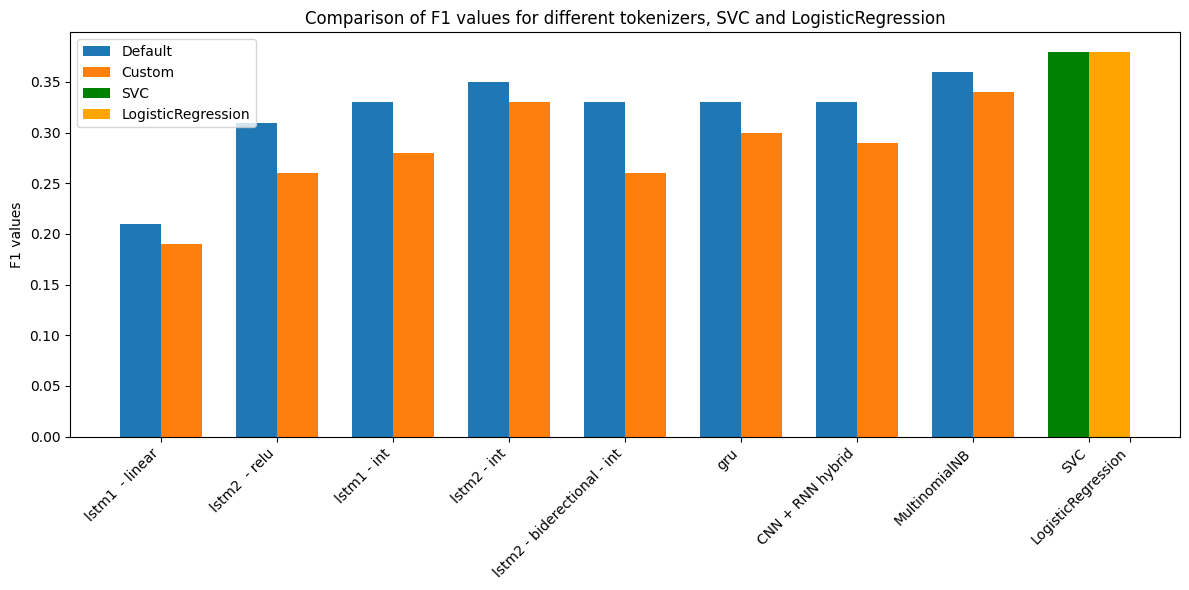

In [25]:
plot_full(pl3f1, pl3f1s,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')

In [26]:
plunacc = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.29,0.29
lstm2  - relu,0.31,0.28
lstm1 - int,0.33,0.30
lstm2 - int,0.33,0.31
lstm2 - biderectional - int,0.32,0.31
gru,0.34,0.32
CNN + RNN hybrid,0.34,0.34
MultinomialNB,0.34,0.35
'''), header=0)


plunaccs = pd.read_csv(io.StringIO('''
SVC,null
LogisticRegression,0.29
'''), header=None, names=["type", "default"])

combined_data = pd.concat([plunacc, plunaccs], ignore_index=True)


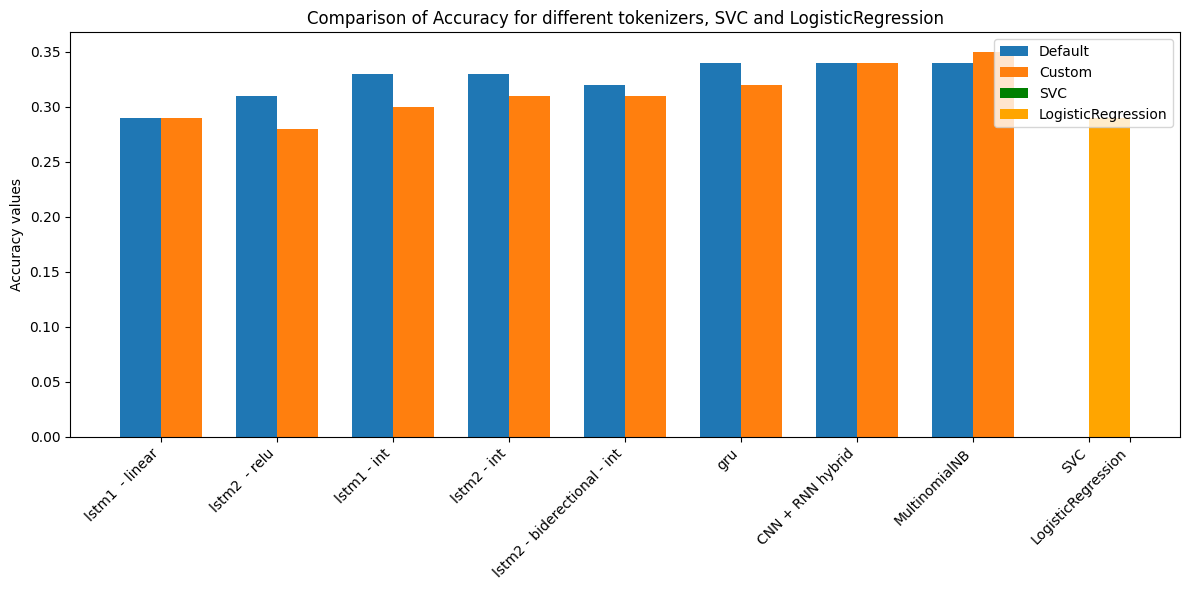

In [27]:
plot_full(plunacc, plunaccs)

In [28]:

plunf1 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.26,0.25
lstm2  - relu,0.29,0.26
lstm1 - int,0.30,0.27
lstm2 - int,0.31,0.27
lstm2 - biderectional - int,0.27,0.27
gru,0.32,0.28
CNN + RNN hybrid,0.32,0.31
MultinomialNB,0.3,0.34

'''), header=0)


plunf1s = pd.read_csv(io.StringIO('''
SVC,null
LogisticRegression,0.29
'''), header=None, names=["type", "default"])

combined_data = pd.concat([plunf1, plunf1s], ignore_index=True)


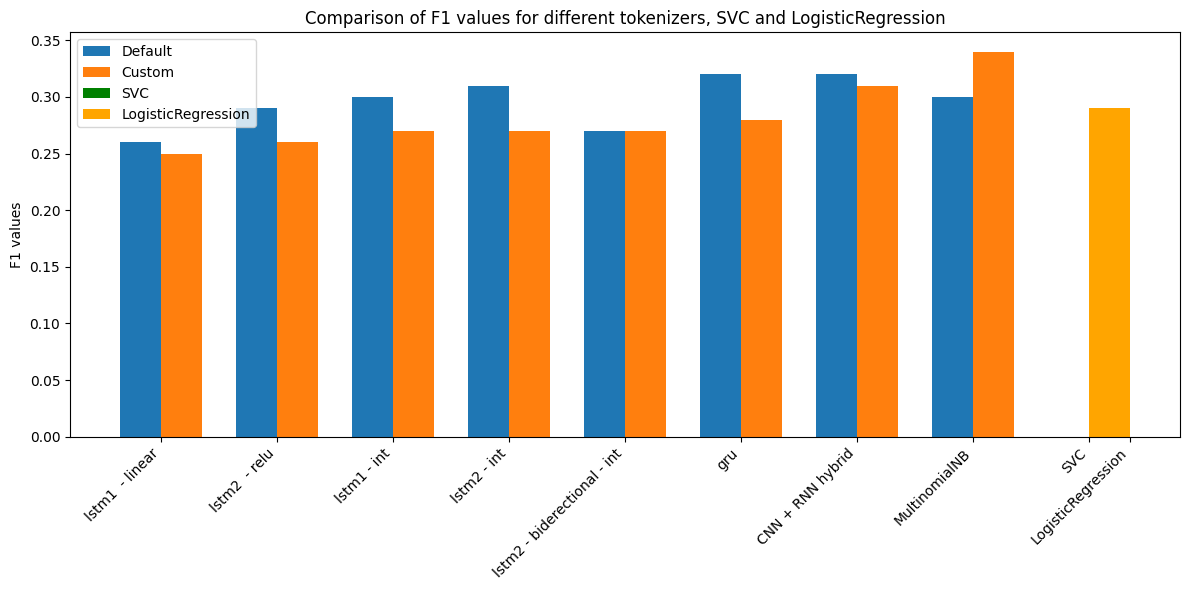

In [29]:
plot_full(plunf1, plunf1s,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')

In [30]:
engunacc = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.39,0.43
lstm2  - relu,0.50,0.5
lstm1 - int,0.49,0.48
lstm2 - int,0.52,0.48
lstm2 - biderectional - int,0.50,0.47
gru,0.53,0.47
CNN + RNN hybrid,0.54,0.53
MultinomialNB,0.48,0.49
'''), header=0)

engunaccs = pd.read_csv(io.StringIO('''
SVC,0.55
LogisticRegression,0.51
'''), header=None, names=["type", "default"])

combined_data = pd.concat([engunacc, engunaccs], ignore_index=True)


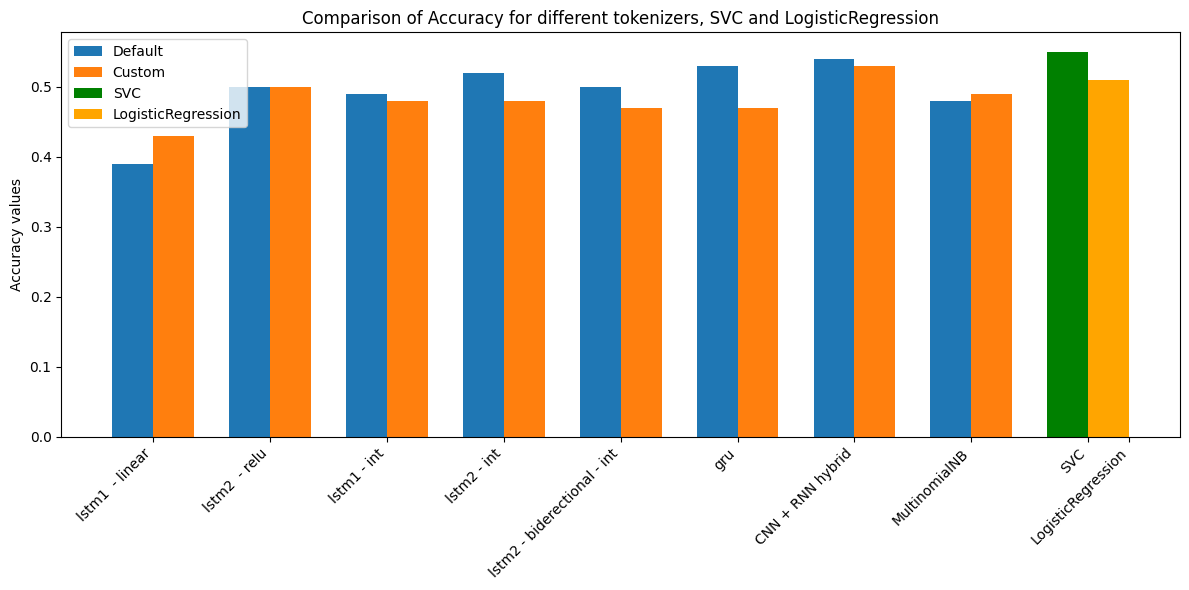

In [31]:
plot_full(engunacc, engunaccs)

In [32]:
angunf1 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.38,0.41
lstm2  - relu,0.50,0.48
lstm1 - int,0.43,0.43
lstm2 - int,0.48,0.47
lstm2 - biderectional - int,0.48,0.45
gru,0.51,0.43
CNN + RNN hybrid,0.53,0.50
MultinomialNB,0.35,0.49

'''), header=0)

engunf1s = pd.read_csv(io.StringIO('''
SVC,0.52
LogisticRegression,0.50
'''), header=None, names=["type", "default"])

combined_data = pd.concat([angunf1, engunf1s], ignore_index=True)

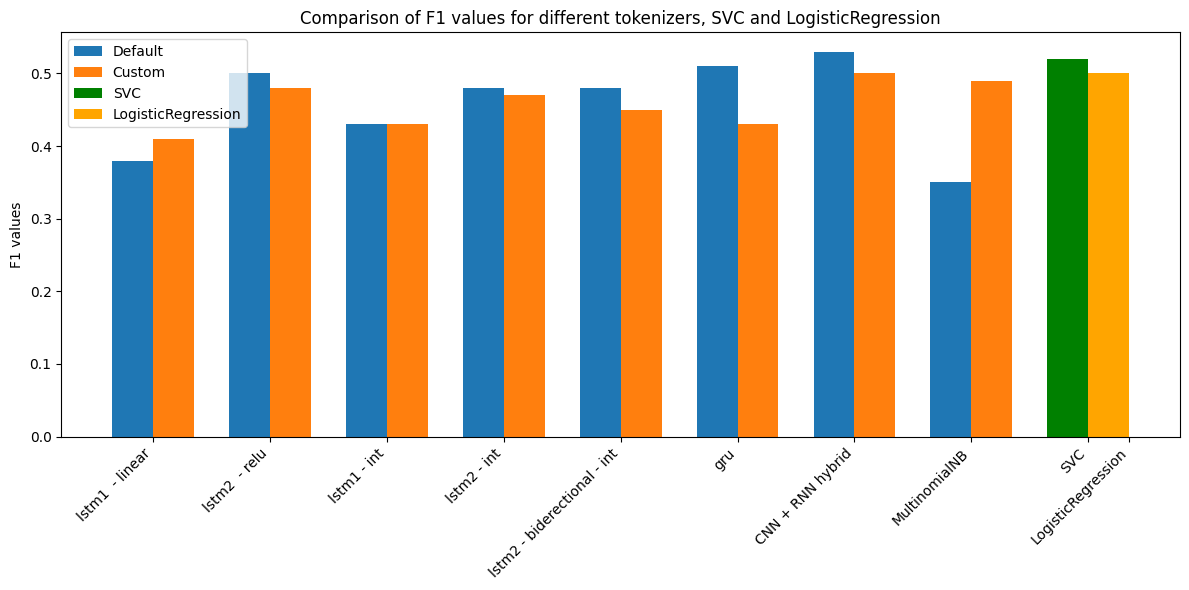

In [33]:
plot_full(angunf1, engunf1s,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')

In [34]:

eng1000acc = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.22,0.22
lstm2  - relu,0.30,0.29
lstm1 - int,0.36,0.32
lstm2 - int,0.32,0.27
lstm2 - biderectional - int,0.34,0.28
gru,0.29,0.25
CNN + RNN hybrid,0.4,0.38
MultinomialNB,0.4,0.42

'''), header=0)


eng1000accf = pd.read_csv(io.StringIO('''
SVC,0.45
LogisticRegression,0.45
'''), header=None, names=["type", "default"])

combined_data = pd.concat([eng1000acc, eng1000accf], ignore_index=True)



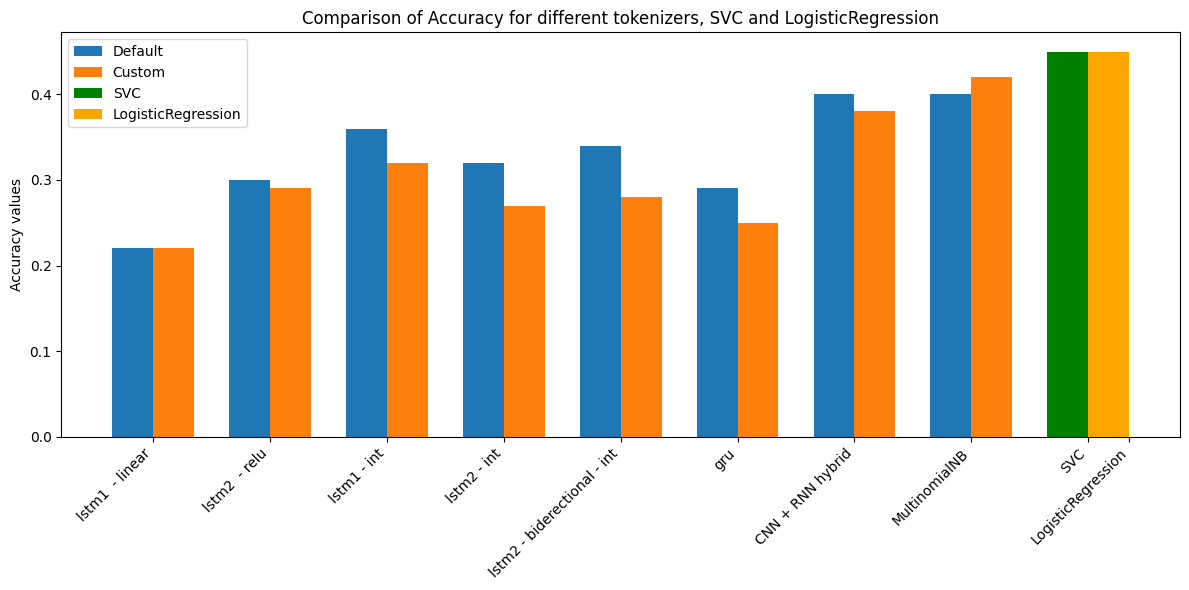

In [35]:
plot_full(eng1000acc, eng1000accf)

In [36]:

eng1000f1 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.15,0.09
lstm2  - relu,0.29,0.28
lstm1 - int,0.35,0.30
lstm2 - int,0.29,0.21
lstm2 - biderectional - int,0.34,0.25
gru,0.28,0.20
CNN + RNN hybrid,0.38,0.38
MultinomialNB,0.39,0.41

'''), header=0)

eng1000f1f = pd.read_csv(io.StringIO('''
SVC,0.45
LogisticRegression,0.45
'''), header=None, names=["type", "default"])

combined_data = pd.concat([eng1000f1, eng1000f1f], ignore_index=True)

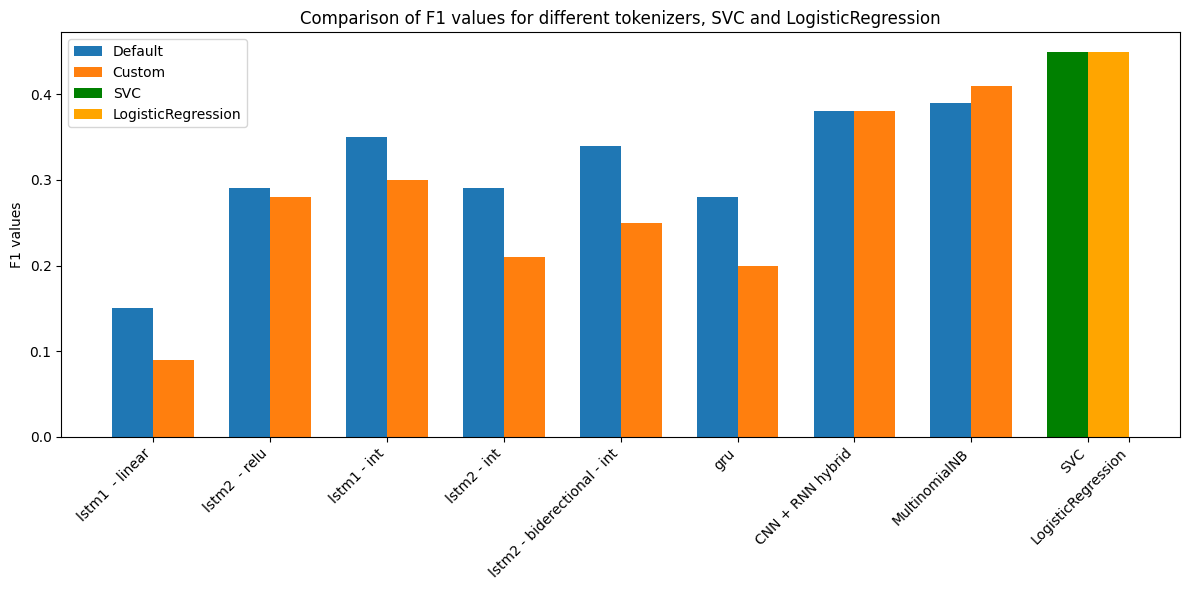

In [37]:
plot_full(eng1000f1, eng1000f1f,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')

In [38]:
eng3000acc = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.32,0.29
lstm2  - relu,0.39,0.35
lstm1 - int,0.43,0.36
lstm2 - int,0.45,0.41
lstm2 - biderectional - int,0.43,0.39
gru,0.41,0.35
CNN + RNN hybrid,0.48,0.46
MultinomialNB,0.44,0.42

'''), header=0)

eng3000accs = pd.read_csv(io.StringIO('''
SVC,0.49
LogisticRegression,0.48
'''), header=None, names=["type", "default"])

combined_data = pd.concat([eng3000acc, eng3000accs], ignore_index=True)


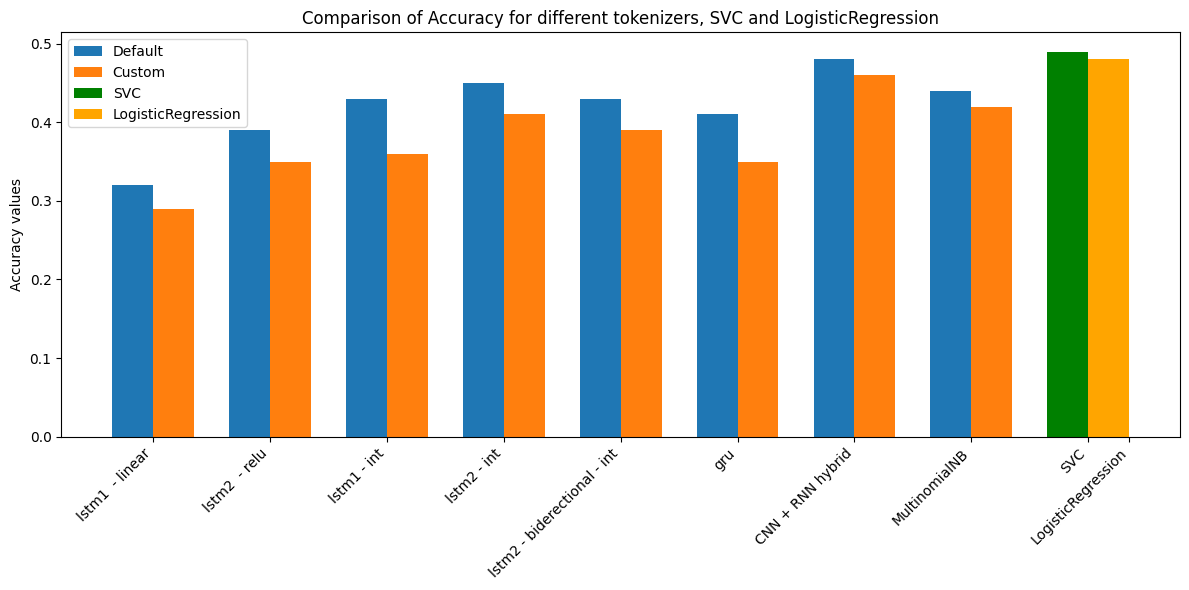

In [39]:
plot_full(eng3000acc, eng3000accs)

In [40]:
eng3000f1 = pd.read_csv(io.StringIO('''
type,default,custom
lstm1  - linear,0.27,0.24
lstm2  - relu,0.39,0.35
lstm1 - int,0.43,0.34
lstm2 - int,0.44,0.39
lstm2 - biderectional - int,0.41,0.37
gru,0.41,0.34
CNN + RNN hybrid,0.47,0.45
MultinomialNB,0.44,0.42

'''), header=0)

eng3000f1s = pd.read_csv(io.StringIO('''
SVC,0.49
LogisticRegression,0.48
'''), header=None, names=["type", "default"])

combined_data = pd.concat([eng3000f1, eng3000f1s], ignore_index=True)

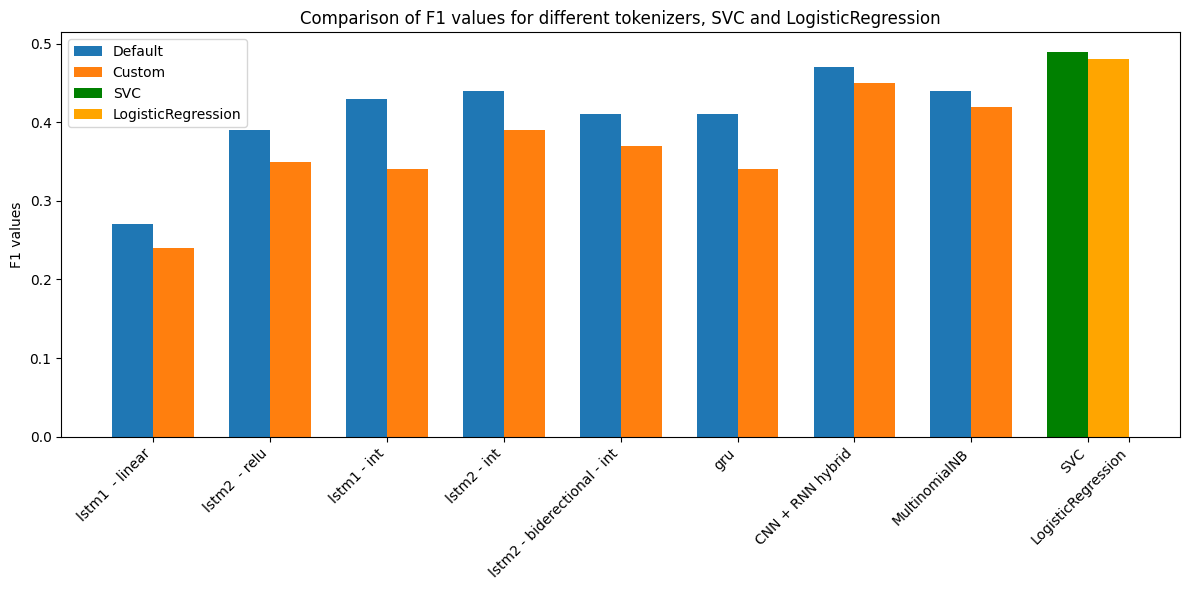

In [41]:
plot_full(eng3000f1, eng3000f1s,'Comparison of F1 values for different tokenizers, SVC and LogisticRegression','F1 values')